In [1]:
import pandas

In [2]:
t = pandas.read_table('E2F1-GCGG.txt', header=None, delimiter=' ')

In [3]:
t.columns = ['chrom','start','end','score']

In [4]:
filtered = t[t['score'] > 0.207]

In [5]:
filtered['start2'] = filtered['start'] + 8
filtered['end2'] = filtered['end'] - 8

/Users/dcl9/Code/envs/env/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/dcl9/Code/envs/env/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [6]:
filtered[['chrom','start2','end2','score']]

,chrom,start2,end2,score
39,chr1,16131,16151,0.306203
55,chr1,20117,20137,0.253157
68,chr1,28399,28419,0.412463
69,chr1,28740,28760,0.253390
75,chr1,28924,28944,0.233164
110,chr1,30085,30105,0.323351
111,chr1,30561,30581,0.285955
123,chr1,39568,39588,0.257872
125,chr1,39724,39744,0.485189
136,chr1,51724,51744,0.214692


Read in the central20bpp predictions

In [7]:
chr1_schipper = pandas.read_table('chr1_schipper.bed',header=None, delimiter=' ')

In [8]:
chr1_schipper.columns = ['chrom','start2','end2','score']

Use pandas join to connect on the start position (adjusted for span), and then see how far off we are

In [9]:
merged = pandas.merge(left=filtered, right=chr1_schipper, left_on='end2', right_on='end2')

There are precision differences, but if we look at 1e-05 as the tolerance, we see about half the data doesn't match

In [11]:
merged['delta'] = merged['score_x'] - merged['score_y']

In [12]:
len(merged[abs(merged['delta']) < 1e-05])

1059

In [13]:
len(merged)

1995

Is this reverse complements?

In [71]:
nonmatch = merged[abs(merged['delta']) > 1e-05]

In [72]:
nonmatch[0:10][['chrom_x','start','end']]

,chrom_x,start,end
0,chr1,16123,16159
3,chr1,28732,28768
7,chr1,39560,39596
9,chr1,51716,51752
13,chr1,88500,88536
17,chr1,121397,121433
18,chr1,138763,138799
21,chr1,159781,159817
29,chr1,233432,233468
31,chr1,325335,325371


Lets look at these ranges


In [73]:
from Bio import SeqIO

In [74]:
hg19 = SeqIO.index('hg19.fa','fasta')

In [75]:
chr1 = hg19['chr1']

In [91]:
def print_scores_and_sequences(df):
    for i, x in df.iterrows():
        s = x['start']
        e = x['end']
        chrom = x['chrom_x']
        seq = str(chr1[s:e].upper().seq)
        print seq, seq[16:20], x['delta']
print_scores_and_sequences(nonmatch[10:30])

GCTCCTCCGACCCAGCGCGGGCACCTCCCTCCACCC GCGG -0.000226541618
TCAAGGAAGGATTAGGCCGCCTTCATTCAGATCTAT CCGC -0.009109273431
TGTAGAAACCCAGACCCCGCTAAATGGAAAATACCA CCGC -0.006072370645
AGAGCCGGGGGAGGTGGCGGGCTGGGTGTGCAGAGT GCGG -0.000377755009
TGACCTTGTGATCTGCCCGCCTCGGCCTCCCAAAGT CCGC -0.008136388323
GCCGATCGCGTGGACCCCGCCTCTGGGCCAAAGGGA CCGC -0.012737105013
TTGGATAGAATGGGAGGCGGGTTTGCCCTAGGCAGT GCGG -0.015872660931
GCAGTGAGCCGAGATCCCGCCACTGCACTCCAGCCT CCGC -0.00295367149
CTTCAATCTACTTCTCCCGCCGCCGGGAAAAAAGGC CCGC -0.005389548511
GTCTGAACTATCCTGCCCGCCATCATCCTAGTCCTT CCGC -0.001386114198
AGAAAAAAAAAAACCACCGCCATCATTTTGCAAGTG CCGC -0.047098364329
CAACACACAGAACCTGGCGGGGAGGTCACTCTTACC GCGG -0.005918982024
TGATGTAGCCGAACACCCGCGCCTCTAACGTCGCCA CCGC -0.007212895236
ATATTTAGGCTGATGGGCGGCAAAATTAGAAAGTAT GCGG -0.008512804463
AGCAGCAGAGCAGAGGGCGGCAAGAGCACCAAGGCC GCGG -0.006153405059
CTCAGTGGGGATGATGGCGGGAAGGCGCCTCCCTCT GCGG -0.001339116507
TGCCTGTCCAGCAGACCCGCCCTTTCTATACTACCT CCGC -0.020969009863
TGTGGCAGGGCTCCT

In [92]:
print_scores_and_sequences(merged[20:40])

ACTTTGGGAGGCCAAGGCGGGTAGATCTTGAGATCA GCGG -1.43658000051e-07
TCATTATTCTTTCTTGGCGGGGAATGGATTCCAGAG GCGG -0.028193669613
ACTTTGGGAGGCTGAGGCGGGTGAATCTCCTGAAGT GCGG -4.08398000029e-07
GGGAGGTCACAATGAGGCGGTCTCCAGGGGTCTTTT GCGG -1.77610000013e-07
GAGGCGCAGTTCCAGGGCGGCTTTCCCCCTCACTTC GCGG -9.09489999978e-08
CTTTCAATGAAGATAGCCGCCTAAAGTTATACAAAT CCGC 2.14180999991e-07
GAAAAAGACTGAGGCCCCGCCAGATGCAACTGCCCA CCGC -7.12500000111e-08
TATTGGTTCATTAACTGCGGCAAATTATGTAAGATA GCGG 2.20882000024e-07
TAGAAAAACAAAAATGGCGGGACATTCTACGGGTGA GCGG -4.65168000008e-07
ACTGCTTAGGGCAAACCCGCCTCCCATTCTATCCAA CCGC -0.017205684542
GGATTACAGGCGTGAGCCGCCATCCCTGGCCCAGTT CCGC -1.23522999995e-07
TCCTGTCCAGCTCATGGCGGCCAATGTAGGCCCAAA GCGG -0.03172383513
ACCAAAATGACCATAGGCGGTAATTCCCCAGGCCGT GCGG 1.0591899996e-07
GCTCCTCCGACCCAGCGCGGGCACCTCCCTCCACCC GCGG -0.000226541618
TCAAGGAAGGATTAGGCCGCCTTCATTCAGATCTAT CCGC -0.009109273431
TGTTTGATGTTTGAAGGCGGCTCGGTTCCTTTAGCT GCGG 3.24880000124e-08
TGTAGAAACCCAGACCCCGCTAAATGGAAAATACCA CCGC -0.

In [100]:
merged[merged['delta'] < -0.06]

,chrom_x,start,end,score_x,start2_x,end2,chrom_y,start2_y,score_y,delta
1890,chr1,4655058,4655094,0.277158,4655066,4655086,chr1,4655066,0.338416,-0.061258


In [101]:
print_scores_and_sequences(merged[merged['delta'] < -0.06])

ATTCGGAGAATAACAGGCGGTTTTCCAAAATCAAAC GCGG -0.061257579413


In [102]:
%matplotlib inline

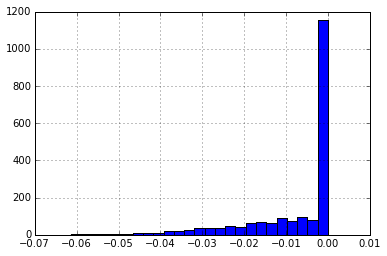

In [129]:
merged['delta'].hist(bins=25)

What next, re-run data without intercept term and see if it's any better?

In [110]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 1994
Data columns (total 10 columns):
chrom_x     1995 non-null object
start       1995 non-null int64
end         1995 non-null int64
score_x     1995 non-null float64
start2_x    1995 non-null int64
end2        1995 non-null int64
chrom_y     1995 non-null object
start2_y    1995 non-null int64
score_y     1995 non-null float64
delta       1995 non-null float64
dtypes: float64(3), int64(5), object(2)
memory usage: 171.4+ KB


In [128]:
merged.describe()

,start,end,score_x,start2_x,end2,start2_y,score_y,delta
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1.995000e+03
mean,2490954.475689,2490990.475689,0.262062,2490962.475689,2490982.475689,2490962.475689,0.269614,-7.551982e-03
std,1204280.832435,1204280.832435,0.053279,1204280.832435,1204280.832435,1204280.832435,0.054075,1.149799e-02
min,16123.000000,16159.000000,0.207084,16131.000000,16151.000000,16131.000000,0.207118,-6.125758e-02
25%,1475588.500000,1475624.500000,0.223276,1475596.500000,1475616.500000,1475596.500000,0.230137,-1.233719e-02
50%,2338639.000000,2338675.000000,0.246027,2338647.000000,2338667.000000,2338647.000000,0.254276,-4.384640e-07
75%,3408104.500000,3408140.500000,0.283994,3408112.500000,3408132.500000,3408112.500000,0.292239,2.045950e-08
max,5096177.000000,5096213.000000,0.575803,5096185.000000,5096205.000000,5096185.000000,0.582213,4.988090e-07


re-ran without intercepts. There were very few matches

In [130]:
len(t)

24429

In [131]:
len(filtered)

2144

In [132]:
len(merged)

1995

In [134]:
float(len(merged)) / float(len(filtered))

0.9305037313432836

93 % match

Maybe it's a difference between libsvm versions? Can I extract the matrix for one of these worse predictions and run it manually?

In [136]:
from predict_genome import svr_features_from_sequence

In [137]:
# worst seqeunce was ATTCGGAGAATAACAGGCGGTTTTCCAAAATCAAAC GCGG -0.061257579413
features = svr_features_from_sequence('ATTCGGAGAATAACAGGCGGTTTTCCAAAATCAAAC', [3])

In [148]:
features_list = ['0','1:1']

for i, feat in enumerate(features):
    s = '{}:{}'.format(i+2, feat['value'])
    features_list.append(s)

feature_matrix = '\t'.join(features_list)

In [149]:
with open('feature-matrix-test.txt', 'w') as f:
    print >> f, feature_matrix

In [150]:
%%bash

svm-predict feature-matrix-test.txt E2F1_SVR.model feature-matrix-output.txt
cat feature-matrix-output.txt

Mean squared error = 0.0768168 (regression)
Squared correlation coefficient = nan (regression)
0.277158


Got same output on compute01, and these match my code. So something else must be different?
I guess I can run TF_Enrichment directly on that sequennce

Put sequence range in a file dcl9_outlier.txt

In [152]:
%cat dcl9-outlier.txt

chr1	4655058	4655094


In [156]:
%run TF_enrichment.py -t SVR -s dcl9-outlier.txt -g hg19.fa -m E2F1_SVR.model -o dcl9-outlier-output.txt


Running the program to get scores for genomic sequences using a SVR or PWM model.
Check example files for proper input file formats.
Generally speaking, input files should not contain any headers.

Note!  If the program needs to get genomic sequences, more than 3GB of memory will be required.

Writing info about this run to dcl9-outlier-output.txt_info.txt
no sequence found in input file
Generating the sequences for the data sets...
This program needs at least 3GB of free memory for loading the genome file
Loading the whole genome from hg19.fa
Reading chr1 ...
Reading chr2 ...
Reading chr3 ...
Reading chr4 ...
Reading chr5 ...
Reading chr6 ...
Reading chr7 ...
Reading chrX ...
Reading chr8 ...
Reading chr9 ...
Reading chr10 ...
Reading chr11 ...
Reading chr12 ...
Reading chr13 ...
Reading chr14 ...
Reading chr15 ...
Reading chr16 ...
Reading chr17 ...
Reading chr18 ...
Reading chr20 ...
Reading chrY ...
Reading chr19 ...
Reading chr22 ...
Reading chr21 ...
Getting scores for this sequ

In [157]:
%cat dcl9-outlier-output.txt_E2F1_SVR_SVR-scores.txt

chr1	4655058	4655094	0.338416


shows that the returned score was 0.33, but the intermediate file shows that two scores were predicted for one sequence

In [159]:
%cat SVRmatrix_temp-prediction.txt

0.338416
0.277158


But why were two predictions made? Because I left the tool to default `best`, and it found one of the other cores in the reverse complement sequence. If I run with `--direction fwd` it only returns the .277 score

In [160]:
%run TF_enrichment.py -t SVR -s dcl9-outlier.txt -g hg19.fa -m E2F1_SVR.model -o dcl9-outlier-output-fwdonly.txt --direction fwd


Running the program to get scores for genomic sequences using a SVR or PWM model.
Check example files for proper input file formats.
Generally speaking, input files should not contain any headers.

Note!  If the program needs to get genomic sequences, more than 3GB of memory will be required.

Writing info about this run to dcl9-outlier-output-fwdonly.txt_info.txt
no sequence found in input file
Loading the data sets with sequences generated previously (delete or rename them if you want generate new ones)
Getting scores for this sequence using the SVR model...
Total number of sequences in the input file: 1
Organizing the sequences for libsvm ...
  Getting the SVR scores for 2 small sequences
svm-predict SVRmatrix_temp.txt E2F1_SVR.model SVRmatrix_temp-prediction.txt
Processing SVR scores
Formatting results for part 1 out of 1 and updating output file: dcl9-outlier-output-fwdonly.txt_E2F1_SVR_FWD_SVR-scores.txt


In [161]:
%cat dcl9-outlier-output-fwdonly.txt_E2F1_SVR_FWD_SVR-scores.txt

chr1	4655058	4655094	0.277158


## Predicting on multiple cores and combining

In order to test this, I must run predictions on all 3 cores, then take the maximum score for each region. I'll do this with sqlite and pandas

Load in the original file into sqlite

In [170]:
import sqlite3

In [172]:
memory_conn = sqlite3.connect(":memory:")

In [167]:
chr1_schipper.columns = ['chrom','start','end','score']

In [173]:
chr1_schipper.to_sql('chr1_schipper',memory_conn)

In [176]:
for row in memory_conn.execute('select * from chr1_schipper limit 10'):
    print row

(0, u'chr1', 10621, 10641, 0.445805)
(1, u'chr1', 10623, 10643, 0.376673)
(2, u'chr1', 10650, 10670, 0.348493)
(3, u'chr1', 10652, 10672, 0.296117)
(4, u'chr1', 10921, 10941, 0.207956)
(5, u'chr1', 11072, 11092, 0.28844200000000003)
(6, u'chr1', 11106, 11126, 0.265825)
(7, u'chr1', 11216, 11236, 0.30495)
(8, u'chr1', 11287, 11307, 0.21586)
(9, u'chr1', 16131, 16151, 0.317127)


In [187]:
# Load existing predictions into database
for f in ['E2F1-CCGC.txt','E2F1-GCGC.txt','E2F1-GCGG.txt']:
    table_name = f.split('.')[0].replace('-','_')
    t = pandas.read_table(f, delimiter=' ',header=None)
    t.columns = ['chrom','start','end','score']
    t.to_sql(table_name, memory_conn)


In [211]:
query = '''
SELECT 
    chr1_schipper.chrom, 
    chr1_schipper.start, 
    chr1_schipper.end, 
    chr1_schipper.score as schipper_score,
    E2F1_CCGC.score as E2F1_CCGC_score,
    E2F1_GCGG.score as E2F1_GCGG_score,
    E2F1_GCGC.score as E2F1_GCGC_score
FROM chr1_schipper
    LEFT JOIN E2F1_CCGC ON chr1_schipper.start - 8 = E2F1_CCGC.start
    LEFT JOIN E2F1_GCGG ON chr1_schipper.start - 8 = E2F1_GCGG.start
    LEFT JOIN E2F1_GCGC ON chr1_schipper.start - 8 = E2F1_GCGC.start
'''
aligned_chr1 = pandas.read_sql_query(query, memory_conn)


In [186]:
for f in ['E2F1-CCGC.txt','E2F1-GCGC.txt','E2F1-GCGG.txt']:
    table_name = f.split('.')[0].replace('-','_')
    print table_name


E2F1_CCGC
E2F1_GCGC
E2F1_GCGG


In [220]:
aligned_chr1['E2F1_max_score'] = aligned_chr1[['E2F1_CCGC_score','E2F1_GCGG_score','E2F1_GCGC_score']].max(axis=1)

In [223]:
aligned_chr1['delta'] = aligned_chr1['E2F1_max_score'] - aligned_chr1['schipper_score']

In [227]:
aligned_chr1.to_sql('aligned_chr1',memory_conn)

In [244]:
aligned_chr1[abs(aligned_chr1['delta']) > 0.01] # The things outside the range don't have any predictions on GCGG or GCGC

,chrom,start,end,schipper_score,E2F1_CCGC_score,E2F1_GCGG_score,E2F1_GCGC_score,E2F1_max_score,delta
5430,chr1,5105748,5105768,0.250615,0.236664,NaN,NaN,0.236664,-0.013951
5431,chr1,5111017,5111037,0.245937,0.202821,NaN,NaN,0.202821,-0.043116
5437,chr1,5142520,5142540,0.493808,0.474741,NaN,NaN,0.474741,-0.019067
5443,chr1,5157384,5157404,0.296127,0.245459,NaN,NaN,0.245459,-0.050668
5446,chr1,5164966,5164986,0.276661,0.262857,NaN,NaN,0.262857,-0.013804
5447,chr1,5170944,5170964,0.475559,0.459958,NaN,NaN,0.459958,-0.015601
5449,chr1,5176004,5176024,0.360167,0.317552,NaN,NaN,0.317552,-0.042615
5452,chr1,5179070,5179090,0.287219,0.270873,NaN,NaN,0.270873,-0.016346
5466,chr1,5217650,5217670,0.232882,0.206577,NaN,NaN,0.206577,-0.026305
5467,chr1,5220742,5220762,0.405746,0.385671,NaN,NaN,0.385671,-0.020075


In [245]:
aligned_chr1.describe()

,start,end,schipper_score,E2F1_CCGC_score,E2F1_GCGG_score,E2F1_GCGC_score,E2F1_max_score,delta
count,9.559000e+04,9.559000e+04,95590.000000,6922.000000,2274.000000,27792.000000,34714.000000,3.471400e+04
mean,1.078722e+08,1.078722e+08,0.294950,0.258995,0.253711,0.308116,0.298855,-1.208283e-03
std,8.160416e+07,8.160416e+07,0.077365,0.058871,0.054783,0.082002,0.080074,6.021029e-03
min,1.062100e+04,1.064100e+04,0.207001,0.104253,0.162947,0.207004,0.104253,-1.042800e-01
25%,3.063431e+07,3.063433e+07,0.236629,0.218483,0.215692,0.245248,0.238107,-2.997313e-07
50%,9.275523e+07,9.275525e+07,0.273705,0.243706,0.238510,0.288581,0.278357,-2.932800e-08
75%,1.832651e+08,1.832651e+08,0.330496,0.282660,0.277111,0.348864,0.337436,2.318517e-07
max,2.492396e+08,2.492396e+08,0.911395,0.631726,0.575803,0.911395,0.911395,4.999800e-07


In [247]:
aligned_covered = aligned_chr1[aligned_chr1['end'] < 5096213]

In [250]:
aligned_covered[abs(aligned_covered['delta']) > 0.000001] # The things outside the range don't have any predictions on GCGG or GCGC

,chrom,start,end,schipper_score,E2F1_CCGC_score,E2F1_GCGG_score,E2F1_GCGC_score,E2F1_max_score,delta


In [251]:
aligned_covered.describe()

,start,end,schipper_score,E2F1_CCGC_score,E2F1_GCGG_score,E2F1_GCGC_score,E2F1_max_score,delta
count,5427.000000,5427.000000,5427.000000,2274.000000,2274.000000,3153.000000,5427.000000,5.427000e+03
mean,2353836.637369,2353856.637369,0.285357,0.255294,0.253711,0.301164,0.285357,2.793047e-09
std,1171367.373096,1171367.373096,0.068703,0.054237,0.054783,0.073984,0.068703,2.869706e-07
min,10621.000000,10641.000000,0.207016,0.131674,0.162947,0.207016,0.207016,-4.998060e-07
25%,1371098.000000,1371118.000000,0.232555,0.217342,0.215692,0.244383,0.232556,-2.430710e-07
50%,2159908.000000,2159928.000000,0.266090,0.241349,0.238510,0.284822,0.266090,-2.980000e-10
75%,3274604.500000,3274624.500000,0.319245,0.279461,0.277111,0.339662,0.319245,2.459285e-07
max,5096185.000000,5096205.000000,0.670775,0.582213,0.575803,0.670775,0.670775,4.998810e-07


Since my individual E2F1 score files had varying levels of coverage, I needed to restrict my filter to just look at where the predictions ran. Otherwise I might only be finding scores for one core and not all 3

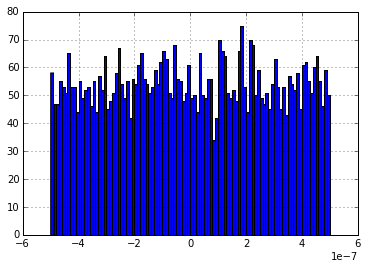

In [256]:
aligned_covered['delta'].hist(bins=100)

Looks pretty good. For the places where I know I have coverage, the deltas are all within 5e-7, which is insignificant, since there are only 6 decimal places in the scores